# Import Packages

In [2]:
# third-party modules (pip install required)
import pandas as pd
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

pd.set_option('display.max_rows', 300)

# Load Data

In [3]:
ica_data = load_json_model('../data/precise1k/precise1k.json.gz')

# Set iM to Annotate

In [487]:
iM_to_annotate = ica_data.imodulon_names[263]
#iM_to_annotate = 'SG_yfiF'
iM_to_annotate

'Membrane Stress'

# Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='262 Gene Weight'>

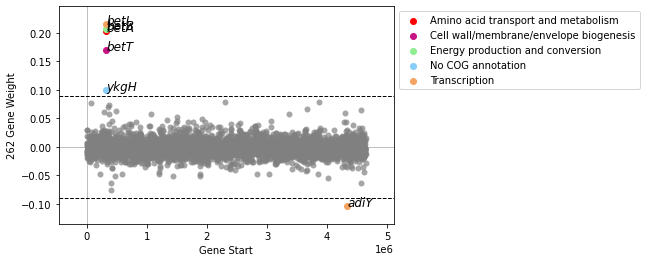

In [476]:
plot_gene_weights(ica_data, iM_to_annotate, adjust_labels=False)

# Show Genes

In [477]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b0313,0.214442,betI,NaN,328747,329334,-,DNA-binding transcriptional repressor BetI,Transcription,P17446,"RpoD,ArcA,Cra,BetI,ppGpp",587
b0312,0.205890,betB,NaN,327261,328733,-,betaine aldehyde dehydrogenase,Energy production and conversion,P17445,"RpoD,ArcA,Cra,BetI,ppGpp",1472
b0311,0.202737,betA,NaN,325577,327247,-,choline dehydrogenase,Amino acid transport and metabolism,P17444,"RpoD,ArcA,Cra,BetI,ppGpp",1670
b0314,0.170049,betT,NaN,329463,331496,+,choline:H(+) symporter,Cell wall/membrane/envelope biogenesis,P0ABC9,"RpoD,ArcA,Cra,BetI",2033
b0310,0.099933,ykgH,NaN,324696,325364,-,uncharacterized protein YkgH,No COG annotation,P77180,Nac,668
b4116,-0.102971,adiY,NaN,4337168,4337929,-,DNA-binding transcriptional activator AdiY,Transcription,P33234,"YieP,H-NS,sgrS",761


# Regulator Enrichment

## Compute TRN Enrichment

In [480]:
trn_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=3, evidence=[0, 1, 2], force=True)
trn_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,262,BetI/YieP,1.372171e-13,0.000001,0.833333,0.5,0.625,5.0,10.0,6.0,2.0
1,262,BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,1.0
2,262,RpoD+BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,2.0
3,262,ArcA+BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,2.0
4,262,Cra+BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,2.0
5,262,RpoD+ArcA+BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,3.0
6,262,RpoD+Cra+BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,3.0
7,262,ArcA+Cra+BetI,1.146517e-12,0.000001,0.666667,1.0,0.800,4.0,4.0,6.0,3.0


### Plot Regulator Histogram

<AxesSubplot:xlabel='Leucine Gene Weight', ylabel='Number of Genes'>

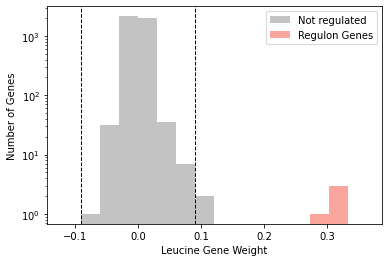

In [50]:
plot_regulon_histogram(ica_data, iM_to_annotate, trn_enrichment.loc[10, 'regulator'])

### Update Regulator Row

In [481]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = trn_enrichment.loc[
    7,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]

In [482]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['trn_enrich_params', 'note']
] = [
    'evidence=[0, 1, 2];max_regs=3', ''
]

## Compute Regulator Enrichment

If the gene list suggests >3 regulators involved simultaneously

In [328]:
iM_to_annotate

'ExuR/YdfH/RhaRS'

In [412]:
specific_regulon = 'NsrR/ppGpp'.replace(',', '+')
specific_enrichment = ica_data.compute_regulon_enrichment(iM_to_annotate, specific_regulon, evidence=[0, 1, 2])
specific_enrichment

pvalue             0.000015
precision          0.818182
recall             0.010922
f1score            0.021557
TP                 9.000000
regulon_size     824.000000
imodulon_size     11.000000
n_regs             2.000000
Name: NsrR/ppGpp, dtype: float64

### Update Regulator Row

In [413]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = specific_enrichment[
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]
ica_data.imodulon_table.loc[iM_to_annotate, 'regulator'] = specific_regulon

In [414]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['trn_enrich_params', 'note']
] = [
    'compute_regulon_enrichment(evidence=[0, 1, 2])', ''
]

# Plot iModulon Activities

<AxesSubplot:ylabel='262 iModulon\nActivity'>

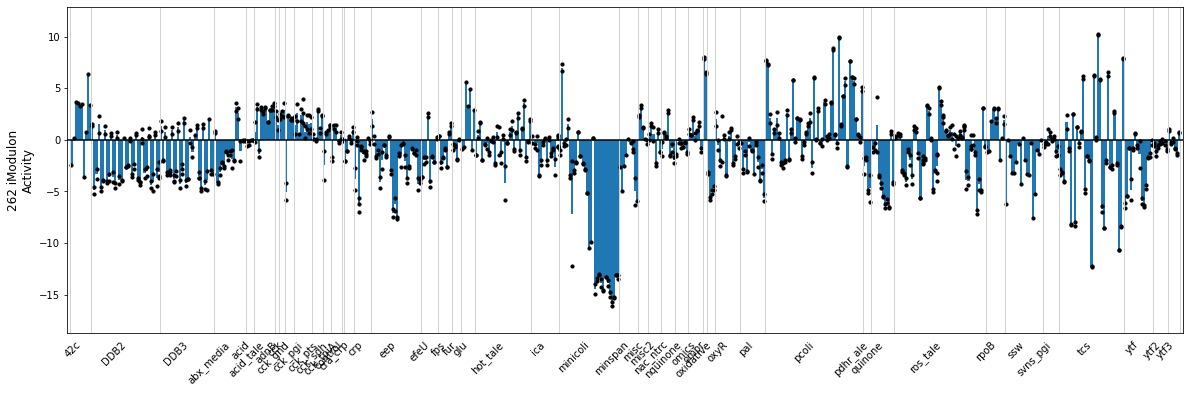

In [478]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

## Specific Project

<AxesSubplot:ylabel='ComR/MarR iModulon\nActivity'>

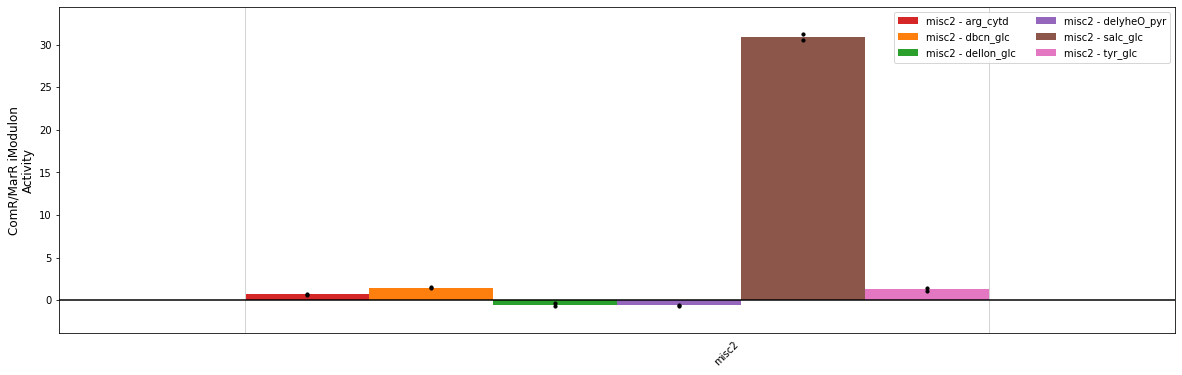

In [470]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='misc2', ax=ax)

## Project Metadata

In [26]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['misc2'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
ecoli_00285,misc2__arg_cytd__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00286,misc2__arg_cytd__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00281,misc2__dbcn_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00282,misc2__dbcn_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00832,misc2__dellon_glc__1,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00833,misc2__dellon_glc__2,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00287,misc2__delyheO_pyr__1,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00288,misc2__delyheO_pyr__2,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00279,misc2__salc_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0
ecoli_00280,misc2__salc_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0


# Update IcaData Object and Tables

## Rename iModulon

In [483]:
ica_data.rename_imodulons({iM_to_annotate: 'BetI'})

In [92]:
[n for n in ica_data.imodulon_names if isinstance(n, str) and 'gcvB' in n]

['Fnr+IHF+gcvB-1']

## Save Tables

In [484]:
ica_data.imodulon_table.to_csv('../data/precise1k/imodulon_table.csv')

In [485]:
ica_data.A.to_csv('../data/precise1k/A.csv')
ica_data.M.to_csv('../data/precise1k/A.csv')

## Save IcaData Object

In [488]:
save_to_json(ica_data, '../data/precise1k/precise1k', compress=True)

# Notes

- Add annotation_confidence (5-scale?)
- function column
- single gene dominant instead of single gene
- drop "related"? re-try enrichment
- make rules for naming
- 